#### Introduction:

Goal is exploring and cleaning a data set that suffers from a variety of data integrity + usability issues.

Here we have dataset of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines.

Data Dictionary:

INDEX - Unique ID
TARGET - Response Variable (indicates # of cases of wine sold)
AcidIndex -  Measures total acidity of wine via a weighted average 
Alcohol - Alcohol Content
Chlorides - Chloride content of the wine
CitricAcid - Citric Acid content of the wine
Density - Density of the wine
FixedAcidity - FixedAcidity of the wine
FreeSulfurDioxide - Sulfur Dioxide content of the wine
LabelAppeal - Subjective marketing score that indicates the appeal of the design of the label on the bottle
ResidualSugar - Residual sugar content of the wine
STARS - Wine rating as determined by experts (4 = excellent; 1 = Poor)
Sulphates - Sulfate content of the wine
TotalSulfurDioxide - Total sulfur dioxide content of the wine
VolatileAcidity - Volatile acid content of the wine
pH - pH of the wine

Steps:
1. We will load the data and do some EDA work to gain some insights from the dataset. 
2. Depending upon the information we learn from EDA work and also domain knowledge of the data, we will try to find key errors and pitfalls in the data which might create problem in futher model training.  
3. Transform data distributions via mathematical transforms (e.g., Box-Cox, logarithms, etc.) or binning to make the data more “usable” for model training
4. Compare the data before and after the transformations and give conclusion. 

In [2]:
# load the pandas library
import pandas as pd
import numpy as np
# importing dataset from github. This data set contains information related to different types of wines
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/M3_Data.csv"
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [3]:
# observations within the data set
len(df)

12795

In [4]:
df #sanity check

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,12790,16120,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,12792,16127,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


#### Exploratory Data Analysis

In [5]:
# dropping the column 'Unnamed' because it is just index values
data= df.drop(columns=['Unnamed: 0','INDEX'])
data.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [6]:
data.shape # 12795 rows and 15 columns

(12795, 15)

In [7]:
# checking datatype and null values of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              12795 non-null  int64  
 1   FixedAcidity        12795 non-null  float64
 2   VolatileAcidity     12795 non-null  float64
 3   CitricAcid          12795 non-null  float64
 4   ResidualSugar       12179 non-null  float64
 5   Chlorides           12157 non-null  float64
 6   FreeSulfurDioxide   12148 non-null  float64
 7   TotalSulfurDioxide  12113 non-null  float64
 8   Density             12795 non-null  float64
 9   pH                  12400 non-null  float64
 10  Sulphates           11585 non-null  float64
 11  Alcohol             12142 non-null  float64
 12  LabelAppeal         12795 non-null  int64  
 13  AcidIndex           12795 non-null  int64  
 14  STARS               9436 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.5 MB


In [8]:
# check for missing values
data.isnull().sum()

TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [9]:
data.isnull().sum()/(len(data))*100 #missing value percentage

TARGET                 0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
LabelAppeal            0.000000
AcidIndex              0.000000
STARS                 26.252442
dtype: float64

We can see that STARS column which gives rating to the wine has 26% missing values followed by sulphates which as approx 9.5 % missing values. 

In [10]:
# Check the statistical information for the dataset
data.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


From the domain knowledge we know that pH value for wine is between 2.9 and 4.2 and here we can see that max value for pH in our dataset is 6.13 which is invalid. 
Also, freesulphurdioxide value should be max of 350. but here in our data set it is 623. 
Some columns has min value to be zero which is not possible. Hence we need to make transformations for these three points to make our data valid for further work. 

In [11]:
# Changing "0" values as missing values(NaN) since minimum values for the columns given below cannot be zero
data['FixedAcidity'].replace(0,np.nan,inplace = True)
data['VolatileAcidity'].replace(0,np.nan,inplace = True)
data['CitricAcid'].replace(0,np.nan,inplace = True)
data['ResidualSugar'].replace(0,np.nan,inplace = True)
data['Chlorides'].replace(0,np.nan,inplace = True)
data['FreeSulfurDioxide'].replace(0,np.nan,inplace = True)
data['TotalSulfurDioxide'].replace(0,np.nan,inplace = True)
data['Sulphates'].replace(0,np.nan,inplace = True)
data['Alcohol'].replace(0,np.nan,inplace = True)

In [12]:
# Description of dataset
data.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12756.000000,12777.000000,12680.000000,12173.000000,12152.000000,12137.000000,12106.000000,12795.000000,12400.000000,11563.000000,12140.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.087904,0.641989,0.692539,23.379327,0.222650,106.775727,204.437263,0.994203,3.207628,0.848279,10.525511,-0.009066,7.772724,2.041755
std,1.926368,4.983786,0.555484,0.605196,24.946418,0.234292,108.103932,163.090000,0.026538,0.679687,0.655193,3.626938,0.891089,1.323926,0.902540
min,0.000000,0.100000,0.005000,0.010000,0.100000,0.001000,1.000000,1.000000,0.888090,0.480000,0.010000,0.100000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.290000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.099000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.900000,0.910000,0.980000,38.700000,0.368000,172.000000,262.750000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


 after replacing 0 with nan, we can see that now the minimum values for our selected columns is no more zero which is expected outcome.

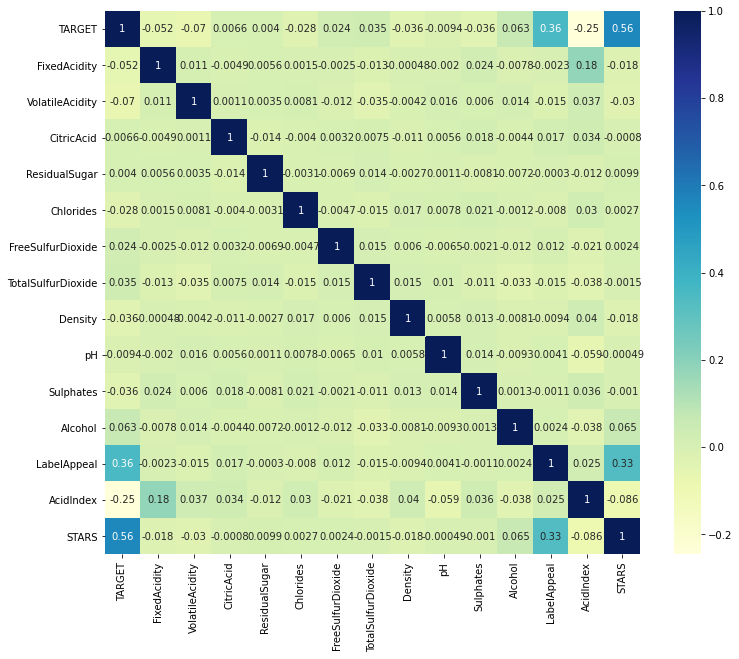

In [14]:
# importing seaborn and matplotlib pyplot libraries 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the features.

From the heatmap it is observed that STARS and TARGET are highly correlated, followed by label appeal and target, label appeal and stars, acidindex and fixedacidity.

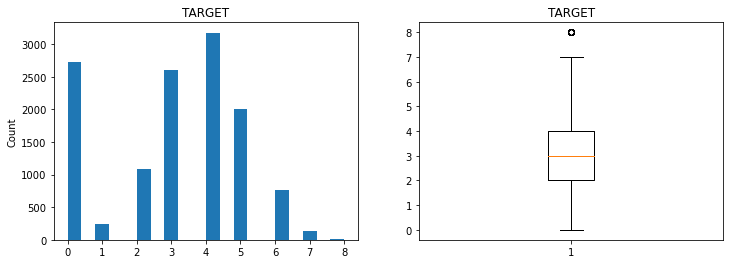

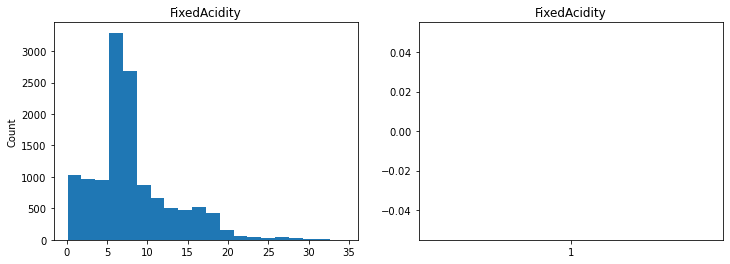

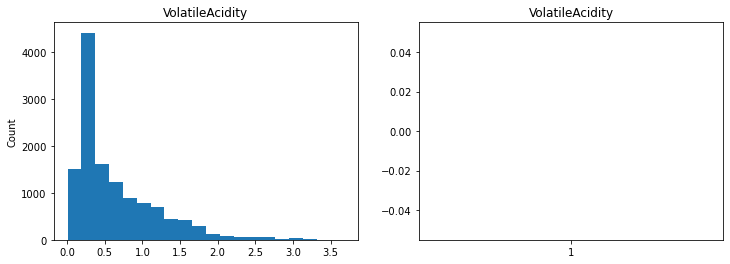

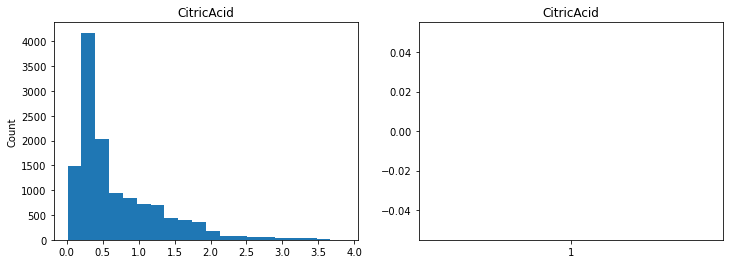

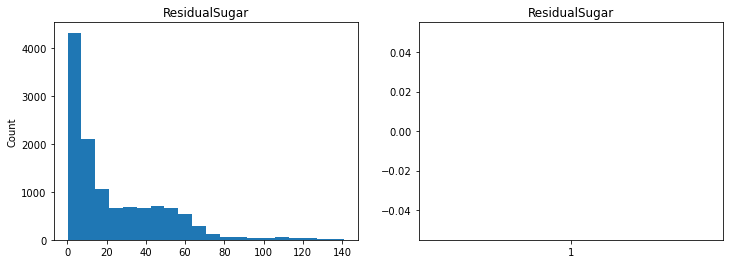

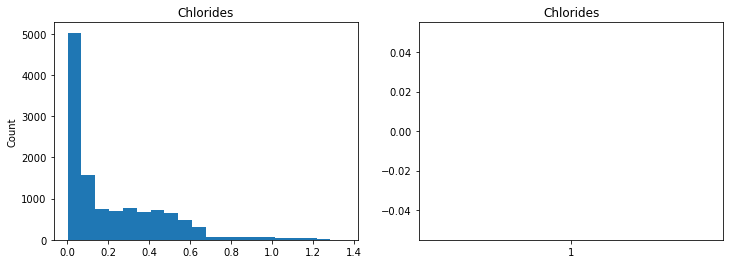

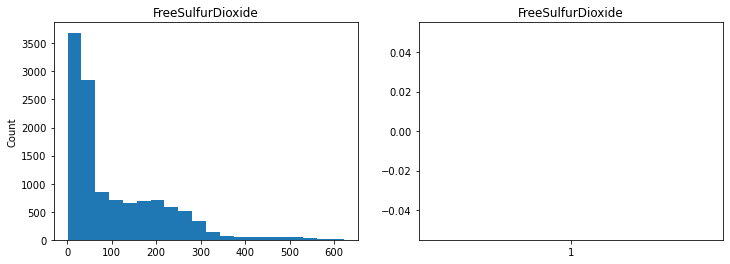

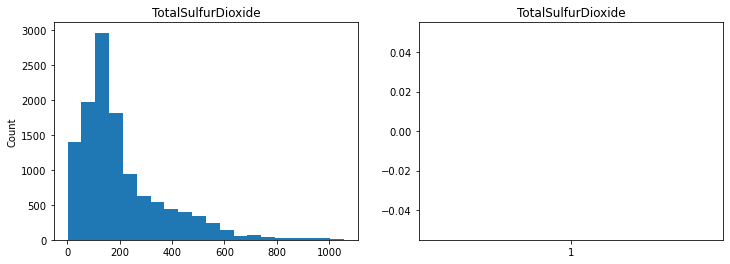

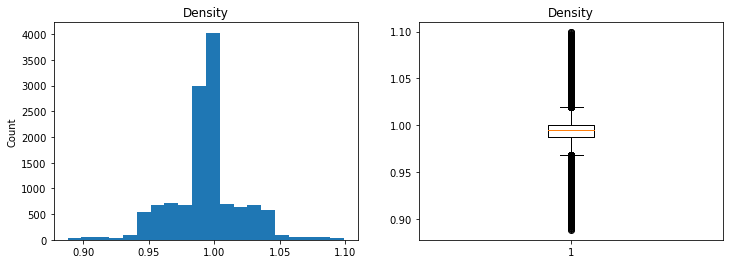

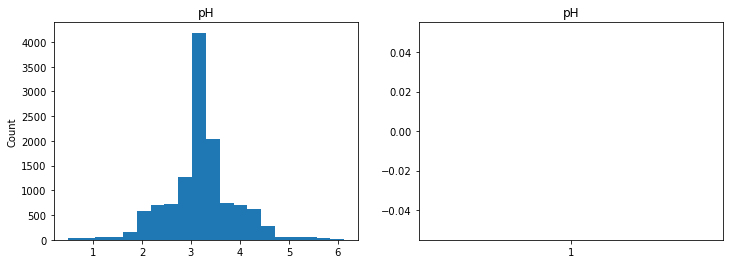

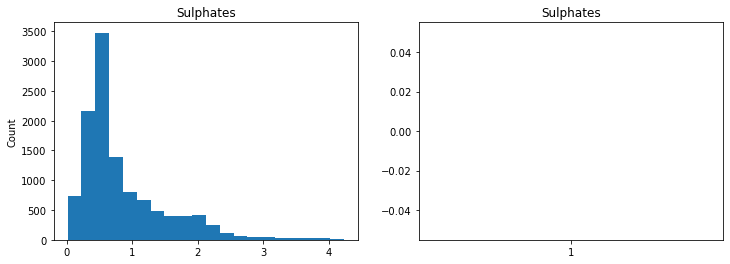

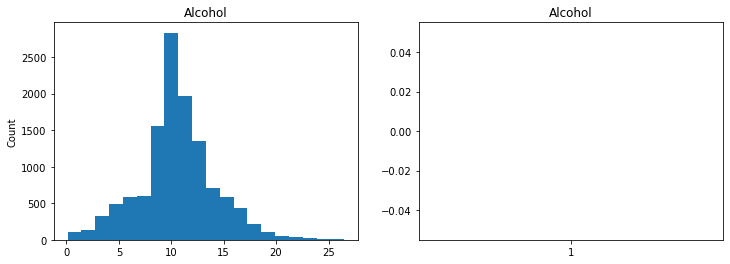

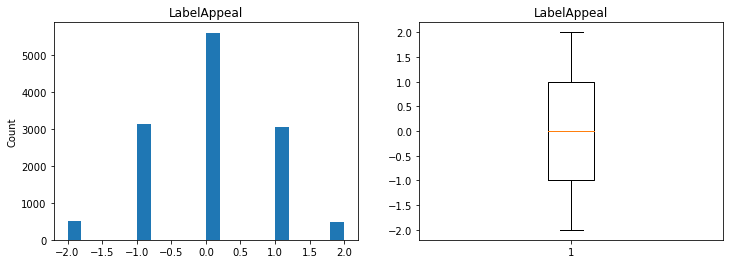

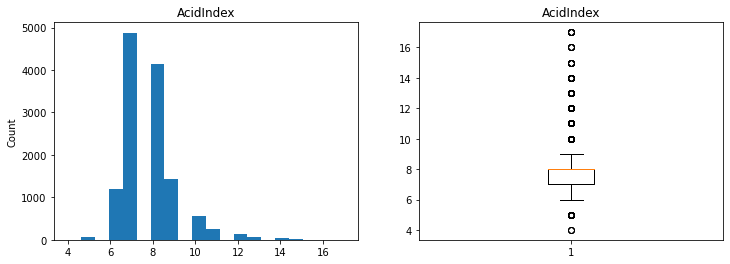

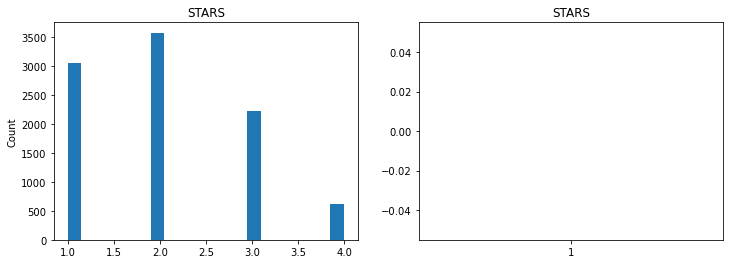

In [15]:
# import pyplot for graph creating
import matplotlib.pyplot as plt

# for each column, create a histogram and boxplot side by side
for i in range(0,15):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=data.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(data.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(data.columns[i])
    plt.show()

From the histogram above it is observed that FixedAcidity, VolatileAcidity , CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide is not normalized and they are right skewed 

#### Data Preparation

In [17]:
# Loading the packages for the models
from sklearn.impute import KNNImputer

In [18]:
# knn function to deal with the missing values
imputer = KNNImputer(n_neighbors=13) #value of nearest neighbor is taken at random as 13 here
data_2 = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [19]:
data_2 #sanity check

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,0.98,54.200000,0.567000,131.538462,268.000000,0.99280,3.33,0.590000,9.900000,0.0,8.0,2.000000
1,3.0,4.5,0.160,0.81,26.100000,0.425000,15.000000,327.000000,1.02792,3.38,0.700000,12.319231,-1.0,7.0,3.000000
2,5.0,7.1,2.640,0.88,14.800000,0.037000,214.000000,142.000000,0.99518,3.12,0.480000,22.000000,-1.0,8.0,3.000000
3,3.0,5.7,0.385,0.04,18.800000,0.425000,22.000000,115.000000,0.99640,2.24,1.830000,6.200000,-1.0,6.0,1.000000
4,4.0,8.0,0.330,1.26,9.400000,0.217231,167.000000,108.000000,0.99457,3.12,1.770000,13.700000,0.0,9.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,0.0,5.0,0.790,2.01,5.000000,0.043000,17.000000,101.000000,1.01077,3.39,0.570000,4.900000,1.0,5.0,1.846154
12791,5.0,8.9,0.470,0.29,84.900000,0.259000,54.000000,213.653846,0.99518,4.46,1.200000,8.784615,-1.0,8.0,2.000000
12792,4.0,6.0,0.170,1.10,37.000000,0.078000,25.000000,108.000000,0.99076,3.25,0.720769,12.300000,0.0,6.0,2.000000
12793,3.0,7.7,0.320,0.12,28.784615,0.029000,26.000000,274.000000,0.99060,3.97,0.620000,11.000000,-1.0,6.0,2.000000


STARS has rating from 1 to 4 so we have to round off the values for STARS column.

In [20]:
data_2 = data_2.round({"STARS":0}) #round off the values
data_2

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,0.98,54.200000,0.567000,131.538462,268.000000,0.99280,3.33,0.590000,9.900000,0.0,8.0,2.0
1,3.0,4.5,0.160,0.81,26.100000,0.425000,15.000000,327.000000,1.02792,3.38,0.700000,12.319231,-1.0,7.0,3.0
2,5.0,7.1,2.640,0.88,14.800000,0.037000,214.000000,142.000000,0.99518,3.12,0.480000,22.000000,-1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.800000,0.425000,22.000000,115.000000,0.99640,2.24,1.830000,6.200000,-1.0,6.0,1.0
4,4.0,8.0,0.330,1.26,9.400000,0.217231,167.000000,108.000000,0.99457,3.12,1.770000,13.700000,0.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,0.0,5.0,0.790,2.01,5.000000,0.043000,17.000000,101.000000,1.01077,3.39,0.570000,4.900000,1.0,5.0,2.0
12791,5.0,8.9,0.470,0.29,84.900000,0.259000,54.000000,213.653846,0.99518,4.46,1.200000,8.784615,-1.0,8.0,2.0
12792,4.0,6.0,0.170,1.10,37.000000,0.078000,25.000000,108.000000,0.99076,3.25,0.720769,12.300000,0.0,6.0,2.0
12793,3.0,7.7,0.320,0.12,28.784615,0.029000,26.000000,274.000000,0.99060,3.97,0.620000,11.000000,-1.0,6.0,2.0


In [21]:
# Check if null values still exist
data_2.isna().sum()

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

No null values are now present in dataset.

Since pH and FreeSulphurdioxide columns is still having invalid values we have to change that and select valid values

In [30]:
# Select the valid data that has "pH"between 3 and 4 and the Total Sulfur Dioxide is no larger than 350.
data_1_valid= np.where((data_2['pH'] > 2.9) & (data_2['pH'] < 4.2) & (data_2['TotalSulfurDioxide'] <= 350 ))
data_new = data_2.loc[data_1_valid]
data_new

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.16,0.98,54.200000,0.567000,131.538462,268.0,0.99280,3.33,0.590000,9.900000,0.0,8.0,2.0
1,3.0,4.5,0.16,0.81,26.100000,0.425000,15.000000,327.0,1.02792,3.38,0.700000,12.319231,-1.0,7.0,3.0
2,5.0,7.1,2.64,0.88,14.800000,0.037000,214.000000,142.0,0.99518,3.12,0.480000,22.000000,-1.0,8.0,3.0
4,4.0,8.0,0.33,1.26,9.400000,0.217231,167.000000,108.0,0.99457,3.12,1.770000,13.700000,0.0,9.0,2.0
5,0.0,11.3,0.32,0.59,2.200000,0.556000,37.000000,15.0,0.99940,3.20,1.290000,15.400000,0.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12787,2.0,6.5,0.15,0.78,1.400000,0.875000,531.000000,105.0,0.99260,3.14,0.593846,10.100000,0.0,7.0,1.0
12790,0.0,5.0,0.79,2.01,5.000000,0.043000,17.000000,101.0,1.01077,3.39,0.570000,4.900000,1.0,5.0,2.0
12792,4.0,6.0,0.17,1.10,37.000000,0.078000,25.000000,108.0,0.99076,3.25,0.720769,12.300000,0.0,6.0,2.0
12793,3.0,7.7,0.32,0.12,28.784615,0.029000,26.000000,274.0,0.99060,3.97,0.620000,11.000000,-1.0,6.0,2.0


Now transforming the data using boxcox power transform to get the normal distribution of the some columns which are right skewed  

In [31]:
#importing required libraries
from scipy.stats import boxcox 
from scipy import stats
from sklearn.preprocessing import power_transform

In [32]:
# Define function called normal_distro
def normal_distro(df, col):
    x = df[col]
    y = stats.boxcox(x)
    df[col] = pd.DataFrame(y)
    return df

In [33]:
# Columns which are right skewed
cols_to_check = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid','ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide','Sulphates', 'Alcohol','AcidIndex']
for col in cols_to_check:
    data_new = normal_distro(data_new, col)

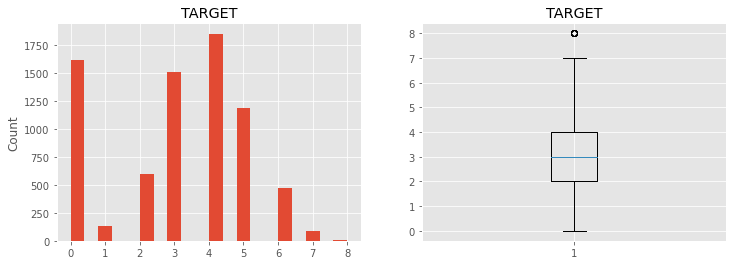

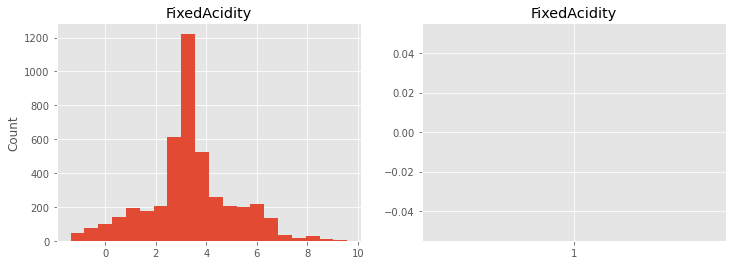

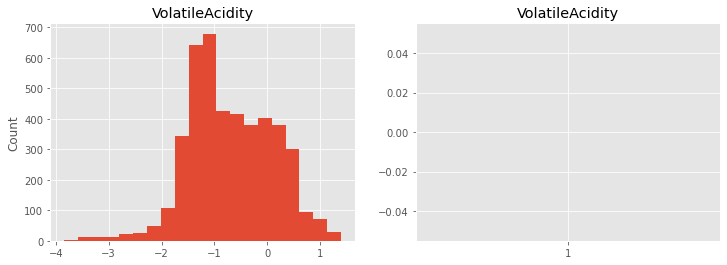

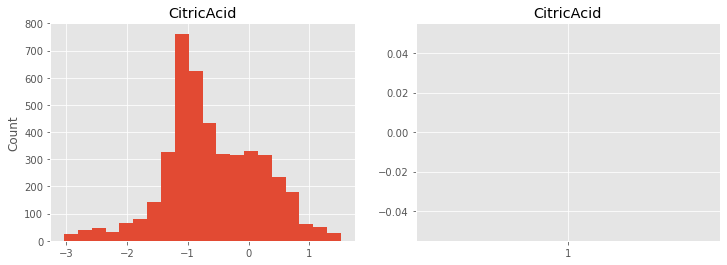

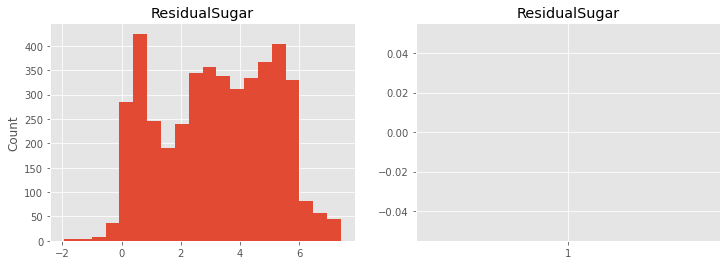

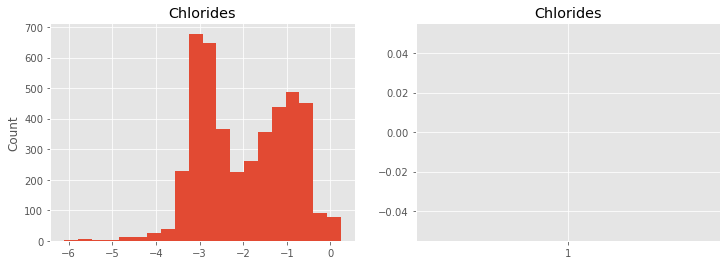

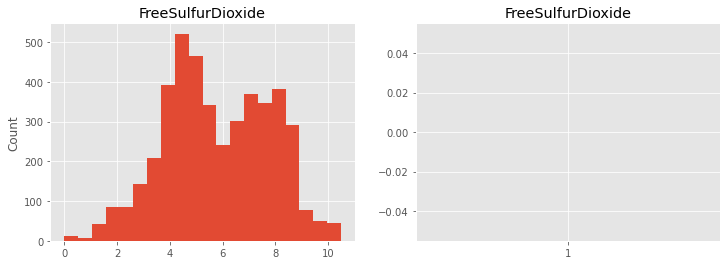

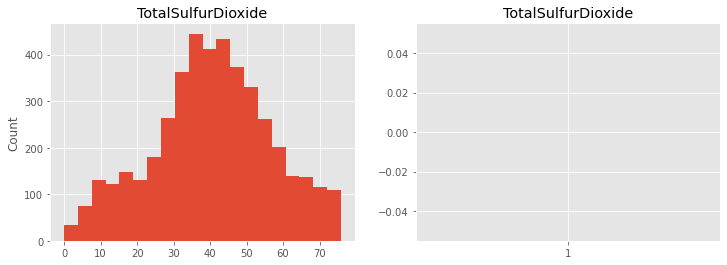

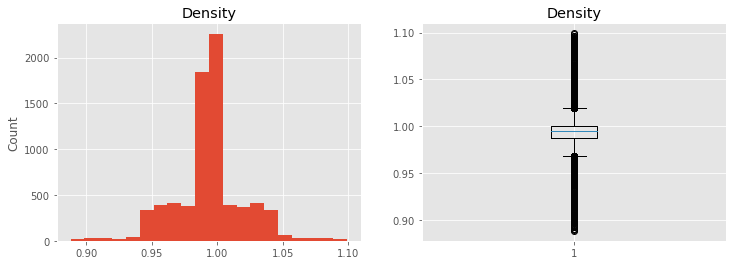

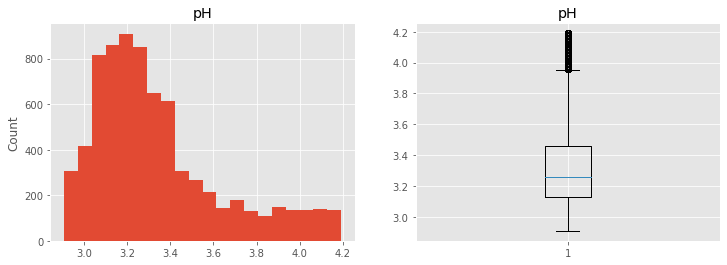

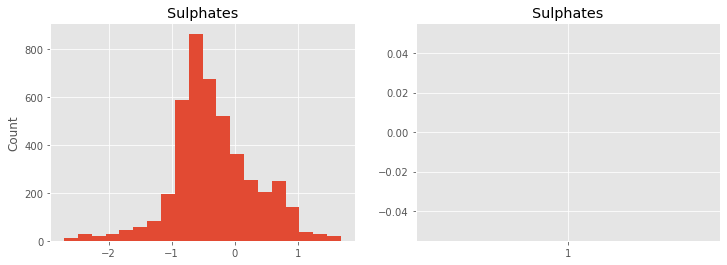

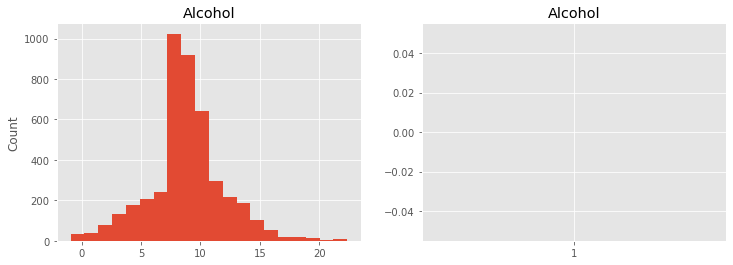

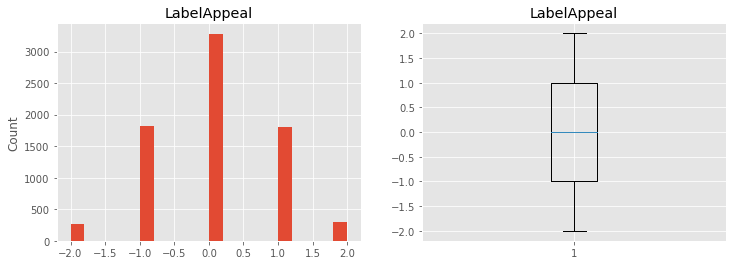

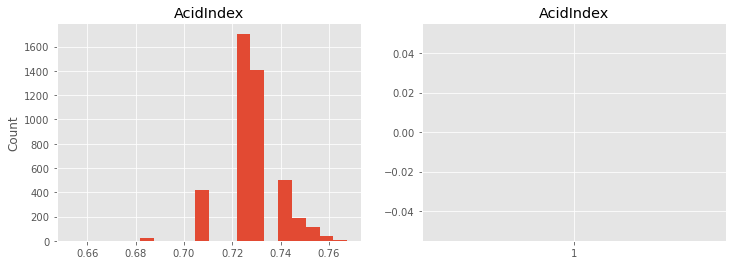

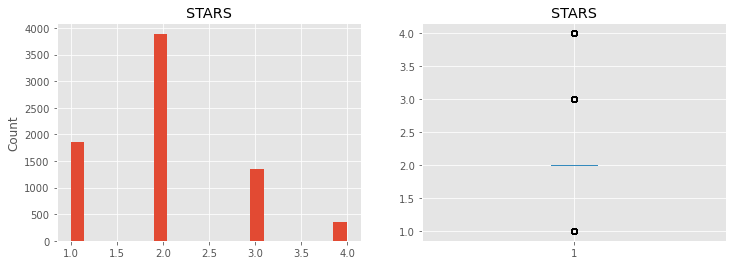

In [35]:
# plotting histogram and boxplot side by side
for i in range(0,15):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=data_new.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(data_new.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(data_new.columns[i])
    plt.show()

From the histogram above it can observed that now the columns which were right skewed earlier are showing normal distribution now. 

#### Prepped Data Review:

We have used KNN imputation to deal with the missing values. Invalid data values is also taken care of. We have also observed that some of the columns which had right skewed data values are normalized and can be seen in the histogram above.

#### Conclusion : 

From the above transformations we have successfully acheived our goal getting a clean data which can be used for further modeling or other work. filling the missing values, dealing with invalid data values and data transformation is done successfully  

References:
1. https://www.python-graph-gallery.com/heatmap/
2. Prof. Topor's notebook (lecture notes)
3. https://www.coleparmer.com/tech-article/measuring-ph-in-wine-making
4. https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
5. https://www.statology.org/box-cox-transformation-python/